# Transition path theory

In [1]:
%pylab inline
import pyemma.plots as mplt
import pyemma.msm as msm

Populating the interactive namespace from numpy and matplotlib


Five-state toy model
---------
The only thing we need to start with is a transition matrix. Usually, such a transition matrix has been estimated as a Markov model from simulation data (see Emma's msm.estimation package). Here we will just define a little five-state toy model in order to illustrate how transition path theory works:

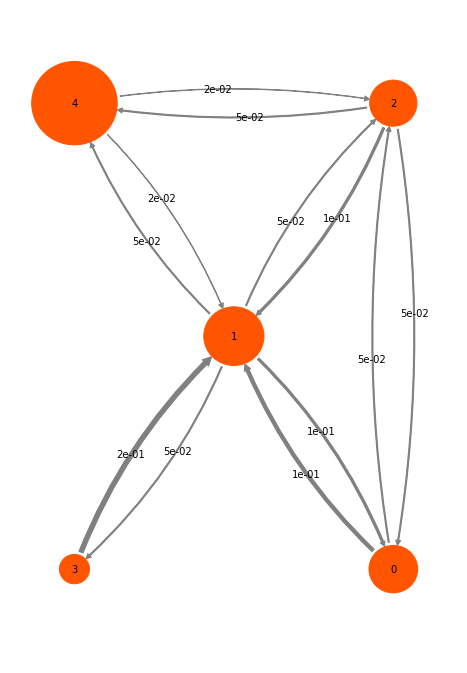

In [2]:
# Start with toy system
P = np.array([[0.8,  0.15, 0.05,  0.0,  0.0],
              [0.1,  0.75, 0.05, 0.05, 0.05],
              [0.05,  0.1,  0.8,  0.0,  0.05],
              [0.0,  0.2, 0.0,  0.8,  0.0],
              [0.0,  0.02, 0.02, 0.0,  0.96]])
M = msm.markov_model(P)
pos = np.array([[2.0,-1.5],[1,0],[2.0,1.5],[0.0,-1.5],[0.0,1.5]])
mplt.plot_markov_model(M, pos=pos);

The disks represent the five discrete states, with areas proportional to the stationary probability of each state. The labels 0-4 plotted within disks are just indexes that will be used to refer to states. The arrows represent transitions between states, with their thickness proportional to the transition probability

Transition path theory
---------------
For doing tpt with the function msm.analysis.tpt(), we only need to pass the transition matrix and the source or reactant state A, and the product or target state B. Here we choose A=0 and B=4:

In [3]:
A = [0]
B = [4]
tpt = msm.tpt(M, A, B)
#tpt = msmflux.tpt(P, A, B)

The object we get back is a TPT flux. It contains a number of quantities of interest. A quantity that we are normally not so much interested in is the **gross flux** of the A->B reaction. The Gross A->B flux is the probability flux of trajectory that start in A and end up in B. Compared to the equilibrium flux $\pi_i p_{ij}$, this flux is smaller because a large part (generally the vase majority) of the equilibrium flux is just spend on nonreactive trajectories that never reach B.

**Flux matrix**:
[[ 0.          0.00771792  0.00308717  0.          0.        ]
 [ 0.          0.          0.00308717  0.00257264  0.00720339]
 [ 0.          0.00257264  0.          0.          0.00360169]
 [ 0.          0.00257264  0.          0.          0.        ]
 [ 0.          0.          0.          0.          0.        ]]
**forward committor**:
[ 0.          0.35714286  0.42857143  0.35714286  1.        ]
**backward committor**:
[ 1.          0.65384615  0.53125     0.65384615  0.        ]

**Gross flux illustration**: 


(<matplotlib.figure.Figure at 0x7f3e6dcd2d68>,
 array([[ 0.        ,  0.        ],
        [ 0.35714286,  0.        ],
        [ 0.42857143,  0.5       ],
        [ 0.35714286, -0.5       ],
        [ 1.        ,  0.        ]]))

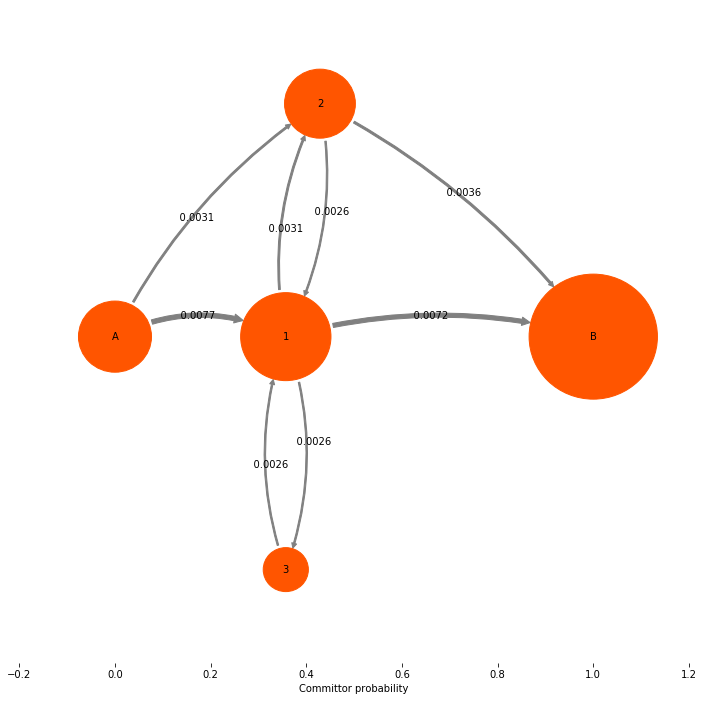

In [6]:
# get tpt gross flux
F = tpt.gross_flux
print('**Flux matrix**:')
print(F)
print('**forward committor**:')
print(tpt.committor)
print('**backward committor**:')
print(tpt.backward_committor)
# we position states along the y-axis according to the commitor
tptpos = np.array([tpt.committor, [0,0,0.5,-0.5,0]]).transpose()
print('\n**Gross flux illustration**: ')
mplt.plot_flux(tpt, pos=tptpos, arrow_label_format="%10.4f", attribute_to_plot='gross_flux')

Note that we have repositioned states such that their y-position equals the committor probability (or probability of folding, splitting probability, etc). The x-position is arbitrary and was chosen such that we will get a nice picture. Clearly, the source state has commitor 0 (it is a reactant, so it has no chance of hitting the product before hitting the reactant), while the target state has committor 1. States 1,2,3 are intermediates with a committor around 0.5 in this case. The forward committor is just one minus the backward commitor, i.e. these two probabilities are complementary. This is true for any transition matrix that fulfills detailed balance - if the transition matrix does not fulfill detailed balance, the committors are not redundant.  
As you can see, Flux is leaving the source state 0 and entering the target state 4. Except for this flux source and flux sink we have flux conservation: The flux leaving state A is identical to the total flux entering state B. In every intermediate state, the flux that enters the state is equal to the flux leaving the state (check for yourself).

The net flux
------------
Now we look at the quantity that is actually interesting: the net flux. Note that in the gross flux above we had fluxes between states 1 and 3. These fluxes just represent that some reactive trajectories leave 1, go to 3, go then back to 1 and then go on to the target state 4 directly or via state 2. This detour via state 3 is usually of no interest, and their contribution is already contained in the main paths 0->1 and 1->{2,4}. Therefore we remove all nonproductive recrossings by taking the difference flux between pairs of states that have fluxes in both directions. This gives us the **net flux**. The net flux is already computed by the TPT object, so normally you will just construct the TPT object and directly get the net flux from it:

**Net-Flux matrix**:
[[  0.00000000e+00   7.71791768e-03   3.08716707e-03   0.00000000e+00
    0.00000000e+00]
 [  0.00000000e+00   0.00000000e+00   5.14527845e-04   8.67361738e-19
    7.20338983e-03]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
    3.60169492e-03]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
    0.00000000e+00]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
    0.00000000e+00]]


(<matplotlib.figure.Figure at 0x7f3e6e1dd358>,
 array([[ 0.        ,  0.        ],
        [ 0.35714286,  0.        ],
        [ 0.42857143,  0.5       ],
        [ 0.35714286, -0.5       ],
        [ 1.        ,  0.        ]]))

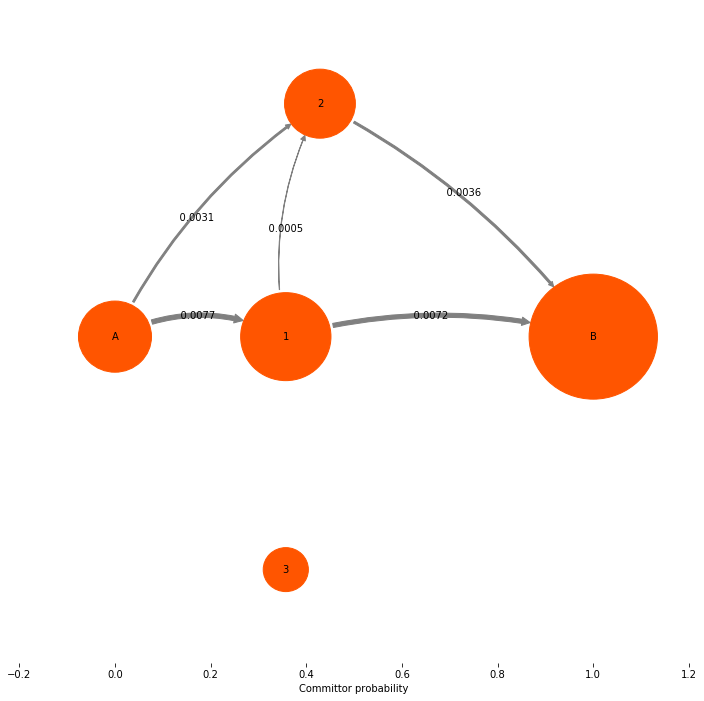

In [7]:
# get tpt net flux
Fp = tpt.net_flux
# or: tpt.flux (it's the same!)
print('**Net-Flux matrix**:')
print(Fp)
# visualize
mplt.plot_flux(tpt, pos=tptpos, arrow_label_format="%10.4f", attribute_to_plot='net_flux')

Note that the Fluxes out of 0 and into 4 have not changed by this operation, because there was no unproductive backflux along these connections. State 3 became completely isolated - it is a dead end. Although reactive trajectories can pass through 3, they will have to return to other states they already have visited (here state 1), and therefore state 3 itself is not a productive state. In fact state 3 will trap trajectories for a while, so the flux would actually increase by removing state 3.  
It is also apparent that the flux 1->2 was reduced by removing the nonproductive backflux. 

Quantitatively, the flux can be interpreted as the number of transition events along a certain pathway per time unit (where time unit means the lag time used to construct the transition matrix). In our toy model, we don't have a physical lag time, so let's call the time unit just '1 step'. The total flux from A->B is given by the total flux that leaves A, or identically the total flux that enters B. It is identical between the gross flux and the net flux.  
The total flux can also be shown to be identical to the inverse round-trip time between A and B (that is the sum of the mean first passage times from A to B and from B to A). Often we are interested in the A->B time or the corresponding rate. This is already computed in the TPT object as well:

In [9]:
print('Total TPT flux = ', tpt.total_flux)
print('Rate from TPT flux = ', tpt.rate)
print('A->B transition time = ', 1.0/tpt.rate)

Total TPT flux =  0.0108050847458
Rate from TPT flux =  0.0272727272727
A->B transition time =  36.6666666667


So when starting in state A=0, it takes on average 36.7 time steps to reach state B=4.  
Let us check that by computing the mean first passage times to state 4 using our original transition matrix using a different algorithm:

In [10]:
print('mfpt(0,4) = ', M.mfpt(0, 4))

mfpt(0,4) =  36.6666666667


Et voilà, this confirms that we have computed the right quantity.  
Note that while this mean first passage time is fine, we should be careful with the interpretation of the A->B tpt transition rate, which is the inverse of mfpt(A,B). Whether or not this is a proper rate constant that corresponds to a transition rate in the sense of reactive flux theory very much depends on the metastability structure of your system and the choice of A and B. In general it makes no sense to just compute inverse mfpt's between all pairs of states (either using tpt or mfpt), and interpret them as rates for a rate matrix.

In our opinion the most useful information conveyed by a TPT flux analysis are not the absolute numbers, but the mechanism, i.e. which pathways is the system going to take from A to B, and what is their relative contribution to the overall reactive flux. Therefore we may want to get rid of the absolute flux numbers and just normalize them to the total flux, so that we can talk about percentages of taking this or that pathway. Let's do that:

Text(0,0.5,'committor')

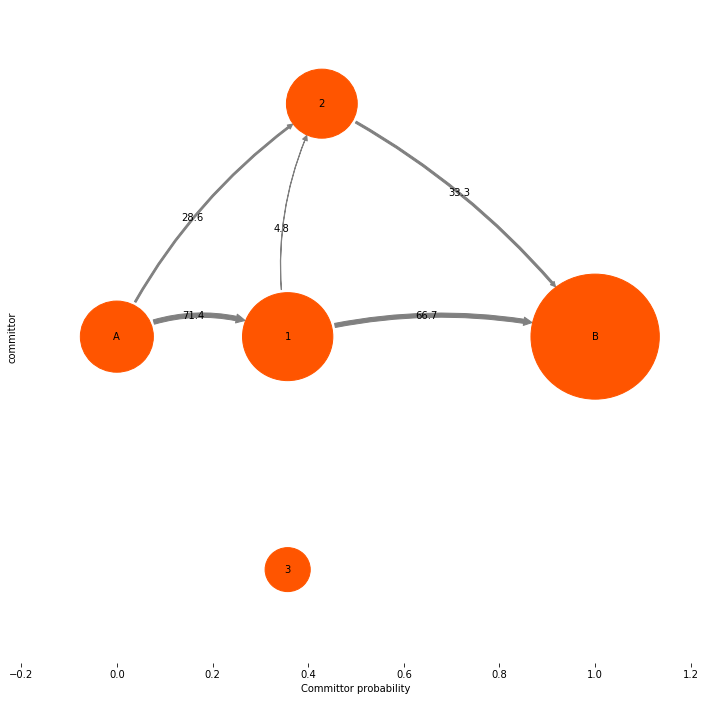

In [11]:
mplt.plot_flux(tpt, pos=tptpos, flux_scale=100.0/tpt.total_flux, arrow_label_format="%3.1f")
ylabel("committor")

Now we can nicely see that the 100% flux leaving A and entering B is split into several paths. The main path obviously is 0->1->4, and this path can support up to 67% of the probability. Pathway 0->2->4 seems to be the second-most important path that can support up to 29% of the probability. We will see below how the network is systematically decomposed into pathways.   
Of course any real trajectory might do much more complicated things, such as 0->0->0->0->1->1->3->1->1->4. But the point of TPT is exactly to remove all these detours, recrossings and waiting times, and just look at "clean" A->B pathways. This concrete trajectory would contribute to the flux 0->1->4.

Pathway decomposition and sub flux
--------------

Now let us have a look how the pathway decomposition works. It's really simple in this example. Here we just call the pathways function, and then list the pathways we have found:

In [12]:
tpt.pathways()

([array([0, 1, 4], dtype=int32),
  array([0, 2, 4], dtype=int32),
  array([0, 1, 2, 4], dtype=int32)],
 [0.0072033898305084278, 0.0030871670702178988, 0.00051452784503631509])

In [13]:
(paths,pathfluxes) = tpt.pathways()
cumflux = 0
print("Path flux\t\t%path\t%of total\tpath")
for i in range(len(paths)):
    cumflux += pathfluxes[i]
    print(pathfluxes[i],'\t','%3.1f'%(100.0*pathfluxes[i]/tpt.total_flux),'%\t','%3.1f'%(100.0*cumflux/tpt.total_flux),'%\t\t',paths[i])

Path flux		%path	%of total	path
0.00720338983051 	 66.7 %	 66.7 %		 [0 1 4]
0.00308716707022 	 28.6 %	 95.2 %		 [0 2 4]
0.000514527845036 	 4.8 %	 100.0 %		 [0 1 2 4]


As expected, we have the main pathway 0->1->4 contributing 66.7% of the flux, and the second pathway 0->2->4 contributing 28.5% of the flux while the remaining 4.8% flow along 0->1->2->4.   
Large Flux networks often contain a few major and many minor pathways. Therefore it is often computationally expensive to compute all pathways. Computing all pathways may not always be needed - in many publications only the most dominant pathways are shown for clarity, see e.g. [3]. If only the most dominant pathways are needed, call the pathways function with a suitable fraction argument. For example, let's compute the top 95% pathways:

In [14]:
(bestpaths,bestpathfluxes) = tpt.pathways(fraction=0.95)
cumflux = 0
print("Path flux\t\t%path\t%of total\tpath")
for i in range(len(bestpaths)):
    cumflux += bestpathfluxes[i]
    print(bestpathfluxes[i],'\t','%3.1f'%(100.0*bestpathfluxes[i]/tpt.total_flux),'%\t','%3.1f'%(100.0*cumflux/tpt.total_flux),'%\t\t',bestpaths[i])

Path flux		%path	%of total	path
0.00720338983051 	 66.7 %	 66.7 %		 [0 1 4]
0.00308716707022 	 28.6 %	 95.2 %		 [0 2 4]


In this case we get only two paths with 95.2% out, because adding the next path would give us 100%. In more realistic (larger) flux networks you will typically get close to the flux fraction asked for.  
In order to plot the netflux containing all the main pathways corresponding to a requested fraction of the total flux, we have to sum up the subset of pathways to obtain a flux again. This is done automatically by the following method:

[[ 0.          0.00720339  0.00308717  0.          0.        ]
 [ 0.          0.          0.          0.          0.00720339]
 [ 0.          0.          0.          0.          0.00308717]
 [ 0.          0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.          0.        ]]


(<matplotlib.figure.Figure at 0x7f3e6d663e10>,
 array([[ 0.        ,  0.        ],
        [ 0.35714286,  0.        ],
        [ 0.42857143,  0.5       ],
        [ 0.35714286, -0.5       ],
        [ 1.        ,  0.        ]]))

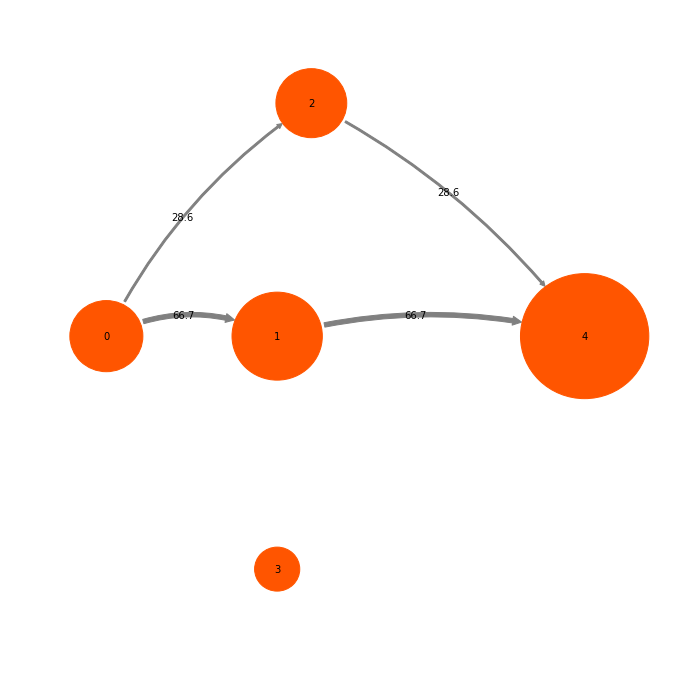

In [15]:
Fsub = tpt.major_flux(fraction=0.95)
print(Fsub)
Fsubpercent = 100.0 * Fsub / tpt.total_flux
mplt.plot_network(Fsubpercent, pos=tptpos, state_sizes=tpt.stationary_distribution, arrow_label_format="%3.1f")

In this case the sub flux only consists of two pathways.

Coarse-graining of fluxes
-----------------

Finally, we will look into coarse-graining of fluxes. You will need this when you have large flux networks that arise from using TPT on Markov state models with many (100s, 1000s) of microstates. In is usually not illustrative to visualize path networks with so many states. Here we will learn how to coarse-grain path networks to coarse sets of states, such as metastable sets of just user-defined sets.

We start with a somewhat larger toy model containing 16 states:

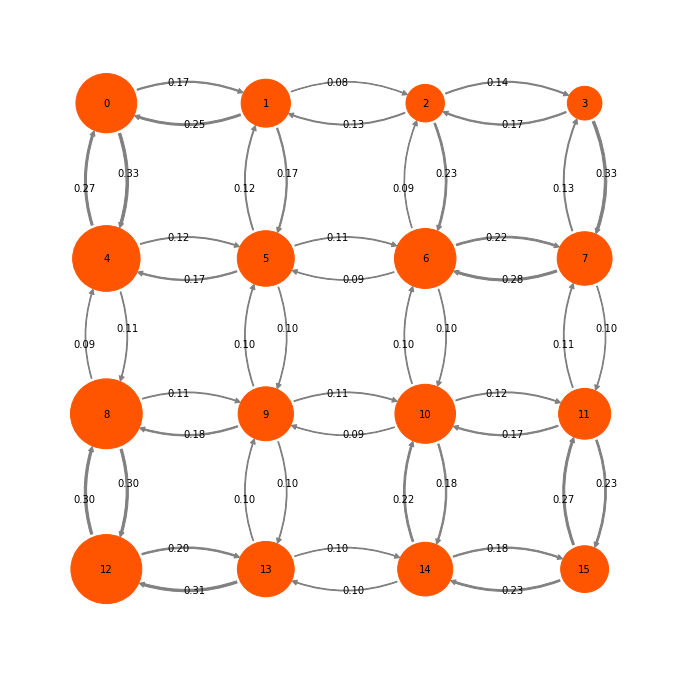

In [16]:
P2_nonrev = np.array([
[0.5, 0.2, 0.0, 0.0, 0.3, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
[0.2, 0.5, 0.1, 0.0, 0.0, 0.2, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
[0.0, 0.1, 0.5, 0.2, 0.0, 0.0, 0.2, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
[0.0, 0.0, 0.1, 0.5, 0.0, 0.0, 0.0, 0.4, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
[0.3, 0.0, 0.0, 0.0, 0.5, 0.1, 0.0, 0.0, 0.1, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
[0.0, 0.1, 0.0, 0.0, 0.2, 0.5, 0.1, 0.0, 0.0, 0.1, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
[0.0, 0.0, 0.1, 0.0, 0.0, 0.1, 0.5, 0.2, 0.0, 0.0, 0.1, 0.0, 0.0, 0.0, 0.0, 0.0],
[0.0, 0.0, 0.0, 0.1, 0.0, 0.0, 0.3, 0.5, 0.0, 0.0, 0.0, 0.1, 0.0, 0.0, 0.0, 0.0],
[0.0, 0.0, 0.0, 0.0, 0.1, 0.0, 0.0, 0.0, 0.5, 0.1, 0.0, 0.0, 0.3, 0.0, 0.0, 0.0],
[0.0, 0.0, 0.0, 0.0, 0.0, 0.1, 0.0, 0.0, 0.2, 0.5, 0.1, 0.0, 0.0, 0.1, 0.0, 0.0],
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.1, 0.0, 0.0, 0.1, 0.5, 0.1, 0.0, 0.0, 0.2, 0.0],
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.1, 0.0, 0.0, 0.2, 0.5, 0.0, 0.0, 0.0, 0.2],
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.3, 0.0, 0.0, 0.0, 0.5, 0.2, 0.0, 0.0],
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.1, 0.0, 0.0, 0.3, 0.5, 0.1, 0.0],
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.2, 0.0, 0.0, 0.1, 0.5, 0.2],
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.3, 0.0, 0.0, 0.2, 0.5],
])
M2_nonrev = msm.markov_model(P2_nonrev)
w_nonrev = M2_nonrev.stationary_distribution
# make reversible
C = np.dot(np.diag(w_nonrev), P2_nonrev)
Csym = C + C.T
P2 = Csym / np.sum(Csym,axis=1)[:,np.newaxis]
M2 = msm.markov_model(P2)
w = M2.stationary_distribution
# plot
P2pos = np.array([[1,4],[2,4],[3,4],[4,4],
                  [1,3],[2,3],[3,3],[4,3],
                  [1,2],[2,2],[3,2],[4,2],
                  [1,1],[2,1],[3,1],[4,1]], dtype=float)
mplt.plot_markov_model(P2, pos=P2pos, state_sizes=w, arrow_label_format="%1.2f");

Let us first decide what a natural coarse-graining of this system would look like. Looking at the timescales, we can see that there is clear gap after three timescales (corresponding to four states). So we use PCCA to find the four most metastable sets and assign each microstate to the nearest metastable set:

In [17]:
def assign_by_membership(M):
    return np.argmax(M, axis=1)

def clusters_by_membership(M):
    a = np.argmax(M, axis=1)
    m = np.shape(M)[1]
    res = []
    for i in range(m):
        res.append(np.where(a == i)[0])
    return res

In [20]:
print("timescales: ",M2.timescales()[0:5])
# PCCA memberships
M2.pcca(4)
M = M2.metastable_memberships
pcca_clusters = clusters_by_membership(M)
print("PCCA clusters",pcca_clusters)

timescales:  [ 13.72527308  10.71049274   5.3830411    2.24980237   1.9671322 ]
PCCA clusters [array([2, 3, 6, 7]), array([10, 11, 14, 15]), array([0, 1, 4, 5]), array([ 8,  9, 12, 13])]


The PCCA clusters are the four sets of four states in the lop left, top right, lower left and lower right corner in our illustration. So for the sake of a TPT analysis we want to lump the microstates within these PCCA clusters and only resolve the pathways connecting them.

Now we first to TPT for the full microstate transition matrix, and obtain the reactive flux in the set of 16 microstates:

In [21]:
# do TPT
A2 = [0,4]
B2 = [11,15]
tpt2 = msm.tpt(M2, A2, B2)

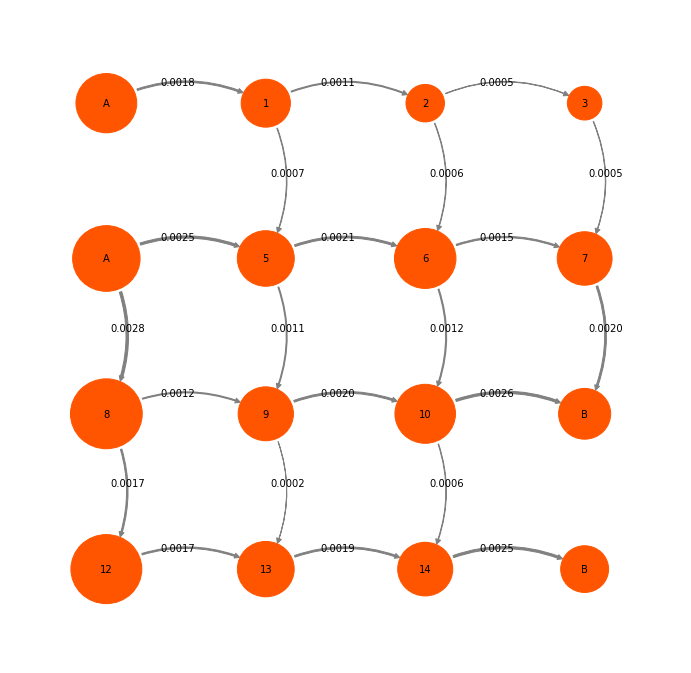

In [22]:
mplt.plot_flux(tpt2, attribute_to_plot='net_flux', pos=P2pos, state_sizes=w, 
               arrow_label_format="%1.4f", show_committor=False);

We have chosen to do TPT starting from states (0,2) and ending in states (11,15). Note that this definition is not exactly compatible with PCCA states. We have defined A and B such that PCCA states are cut. This is fine, because we usually conduct TPT in such a way as to resolve a specific process that is of our interest. Whether the sets that we want to define as TPT endstates are metastable or not is a different question. So we have to deal with this.  

Now we call the coarse-grain method with the PCCA clusters we want to distinguish

In [23]:
(tpt_sets, tpt2_coarse) = tpt2.coarse_grain(pcca_clusters)

This function redefines the sets on which the TPT flux will be coarse-grained in order to meet two objectives:

   * the states we want to distinguish will be distinguished
   * the boundaries between A, B and the intermediates will be respected.  
   
Because of this redefinition, you will get two objects as an output. First the actual set definition that was used, secondly the new coarse-grained flux. Let's look at the sets:

In [24]:
print(tpt_sets)

[OrderedSet([0, 4]), OrderedSet([2, 3, 6, 7]), OrderedSet([10, 14]), OrderedSet([1, 5]), OrderedSet([8, 9, 12, 13]), OrderedSet([11, 15])]


You can see that the PCCA sets are still distinguished. In Addition the PCCA set (0,1,4,5) was split into (0,4), which is the new A set, and (1,5), which is an intermediate set. Likewise (10,11,14,15) was split into the intermediate set (10,14) and the B set (11,15).

Now we print the full information of the coarse-grained flux:

In [26]:
print(tpt_sets)
print(tpt2_coarse.A)
print(tpt2_coarse.B)
print("pi coarse: ")
print(tpt2_coarse.stationary_distribution)
print("sum = ",np.sum(tpt2_coarse.stationary_distribution))
print("committors : ")
print(tpt2_coarse.committor)
print(tpt2_coarse.backward_committor)
print("F coarse : ")
print(tpt2_coarse.gross_flux)
print("F net coarse : ")
print(tpt2_coarse.net_flux)

[OrderedSet([0, 4]), OrderedSet([2, 3, 6, 7]), OrderedSet([10, 14]), OrderedSet([1, 5]), OrderedSet([8, 9, 12, 13]), OrderedSet([11, 15])]
[0]
[5]
pi coarse: 
[ 0.15995388  0.18360442  0.12990937  0.11002342  0.31928127  0.09722765]
sum =  1.0
committors : 
[ 0.          0.56060272  0.73052426  0.19770537  0.36514272  1.        ]
[ 1.          0.43939728  0.26947574  0.80229463  0.63485728  0.        ]
F coarse : 
[[ 0.          0.          0.          0.00427986  0.00282259  0.        ]
 [ 0.          0.          0.00234578  0.00104307  0.          0.00201899]
 [ 0.          0.00113892  0.          0.          0.00142583  0.00508346]
 [ 0.          0.00426892  0.          0.          0.00190226  0.        ]
 [ 0.          0.          0.00530243  0.00084825  0.          0.        ]
 [ 0.          0.          0.          0.          0.          0.        ]]
F net coarse : 
[[ 0.          0.          0.          0.00427986  0.00282259  0.        ]
 [ 0.          0.          0.00120686  0

Indeed we have a normal ReactiveFlux object, just with less (6) states. In order to visualize what the coarse-graining has done to our flux, we will compute the positions of the coarse states as the mean of the fine states that were lumped:

In [27]:
# mean positions of new states
cgpos = []
print("set\t\tposition")
for s in tpt_sets:
    p = np.mean(P2pos[list(s)], axis=0)
    cgpos.append(p)
    print(list(s),"\t\t",p)
cgpos = np.array(cgpos)

set		position
[0, 4] 		 [ 1.   3.5]
[2, 3, 6, 7] 		 [ 3.5  3.5]
[10, 14] 		 [ 3.   1.5]
[1, 5] 		 [ 2.   3.5]
[8, 9, 12, 13] 		 [ 1.5  1.5]
[11, 15] 		 [ 4.   1.5]


Let's plot the coarse-grained flux network:

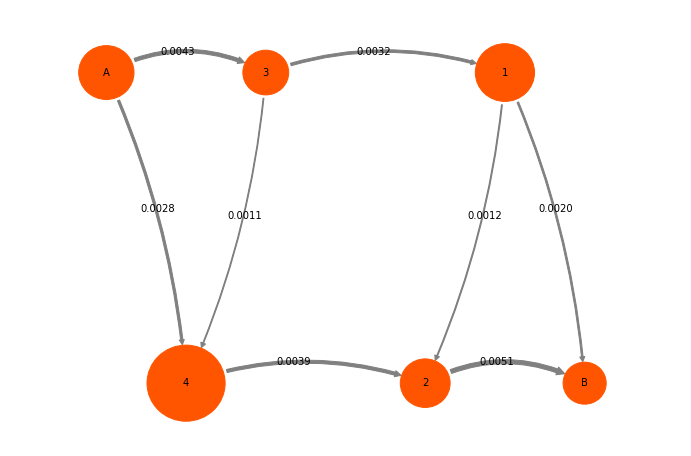

In [28]:
mplt.plot_flux(tpt2_coarse, cgpos, arrow_label_format="%1.4f", show_committor=False);

And the same as percentages:

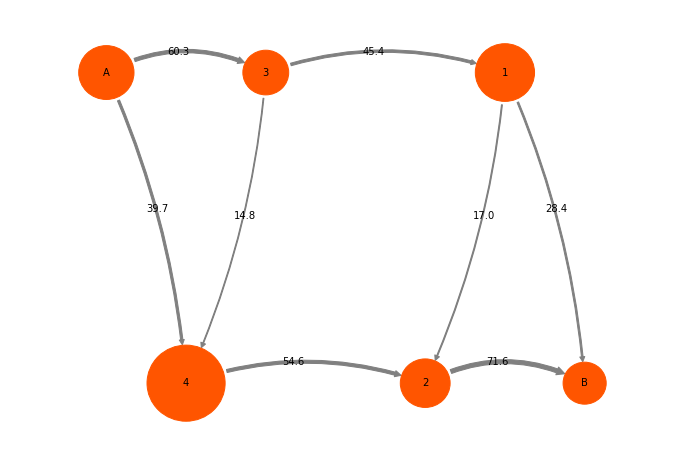

In [29]:
Fpercent = 100.0 * tpt2_coarse.net_flux / tpt2_coarse.total_flux
mplt.plot_flux(tpt2_coarse, pos=cgpos, flux_scale=100.0/tpt2_coarse.total_flux, arrow_label_format="%3.1f", show_committor=False);

We can treat this ReactiveFlux like the microstate reactive flux. For example, we can decompose it into pathways:

In [31]:
(paths,pathfluxes) = tpt2_coarse.pathways()
cumflux = 0
print("Path flux\t\t%path\t%of total\tpath")
for i in range(len(paths)):
    cumflux += pathfluxes[i]
    print(pathfluxes[i],'\t','%3.1f'%(100.0*pathfluxes[i]/tpt2_coarse.total_flux),'%\t','%3.1f'%(100.0*cumflux/tpt2_coarse.total_flux),'%\t\t',paths[i])

Path flux		%path	%of total	path
0.00282258751971 	 39.7 %	 39.7 %		 [0 4 2 5]
0.00201898833783 	 28.4 %	 68.2 %		 [0 3 1 5]
0.00120685936301 	 17.0 %	 85.2 %		 [0 3 1 2 5]
0.00105400896725 	 14.8 %	 100.0 %		 [0 3 4 2 5]


Literature
----------

    [1] W. E and E. Vanden-Eijnden.
        Towards a theory of transition paths. 
        J. Stat. Phys. 123: 503-523 (2006)
        
    [2] P. Metzner, C. Schuette and E. Vanden-Eijnden.
        Transition Path Theory for Markov Jump Processes. 
        Multiscale Model Simul 7: 1192-1219 (2009)
        
    [3] F. Noe, Ch. Schuette, E. Vanden-Eijnden, L. Reich and T. Weikl: 
        Constructing the Full Ensemble of Folding Pathways from Short Off-Equilibrium Simulations. 
        Proc. Natl. Acad. Sci. USA, 106, 19011-19016 (2009)

